Data Visualization and Exploration
CPSC 5530
CRN 21428
Hunter Harris: zgt795
Assignment 2: 4 Dimensions

Import Libraries

In [172]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

Read Data

In [173]:
# Store .csv data in a DataFrame
ski_df = pd.read_csv("European_Ski_Resorts.csv")

Inspect Dataset

In [174]:
# Inspect DataFrame
print(ski_df)
print(ski_df.info())
print(ski_df.describe())
print(ski_df.value_counts('Country'))

     Unnamed: 0                                             Resort  \
0             1                              Alpendorf (Ski amedé)   
1             2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...   
2             3                              Oberau (Wildschönau)   
3             4                                     Dachstein West   
4             5                                        Rosa Khutor   
..          ...                                                ...   
371         372                          Montgenèvre (Via Lattea)   
372         373                          Sauze d’Oulx (Via Lattea)   
373         374             Gressoney - La-Trinite (Monterosa Ski)   
374         375                          Champoluc (Monterosa Ski)   
375         376                                         Zauchensee   

             Country  HighestPoint  LowestPoint  DayPassPriceAdult  \
0            Austria          1980          740                 52   
1            Andorr

Data Cleaning

In [175]:
# Consider top 5 countries with the highest resort count
countries = ski_df['Country'].value_counts().index.tolist()[0:5]
ski_df = ski_df[ski_df['Country'].isin(countries)]

# Reset index to match number of items still present (301)
ski_df.reset_index(drop=True, inplace=True)

# Select 4 different attributes for analysis
ski_df = ski_df[['Country', 'DifficultSlope', 'IntermediateSlope', 'BeginnerSlope']]
ski_df_scaled = ski_df.copy()
ski_df = ski_df.groupby("Country").mean().astype(int)
ski_df = ski_df.reset_index()

# Scale Data
features = ski_df_scaled[['DifficultSlope', 'IntermediateSlope', 'BeginnerSlope']]
ski_df_scaled[['DifficultSlope', 'IntermediateSlope', 'BeginnerSlope']] = StandardScaler().fit_transform(ski_df_scaled[['DifficultSlope', 'IntermediateSlope', 'BeginnerSlope']])

       Country  DifficultSlope  IntermediateSlope  BeginnerSlope
0      Austria               9                 38             30
1       France              19                 58             73
2      Germany               1                  7              3
3        Italy              12                 44             27
4  Switzerland              15                 47             30


Visualize Data - PCA

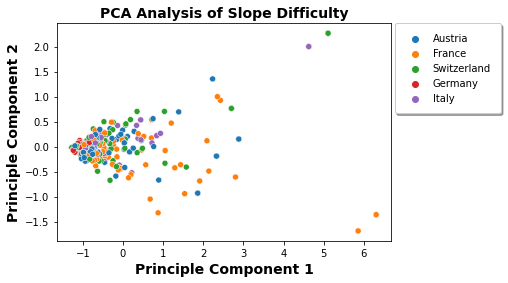

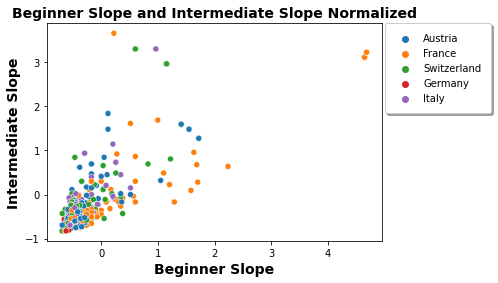

In [176]:
# Principal Component Analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ski_df_scaled[['DifficultSlope', 'IntermediateSlope', 'BeginnerSlope']])
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([ski_df_scaled['Country'], principalDf], axis=1)

# Plot PCA scatter plot
sns.scatterplot(data=final_df, x='principal component 1', y='principal component 2', hue='Country')
plt.xlabel("Principle Component 1",fontweight='bold', fontsize = 14)
plt.ylabel("Principle Component 2", fontweight='bold', fontsize = 14)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, fontsize=10, shadow=True, borderpad=1)
plt.title("PCA Analysis of Slope Difficulty", fontsize = 14, fontweight='bold')
plt.savefig("PCA_scatter", dpi=1200, bbox_inches = 'tight')
plt.show()

# Plot Beginner vs. Intermediate as scatter plot
sns.scatterplot(data=ski_df_scaled, x='BeginnerSlope', y='IntermediateSlope', hue='Country')
plt.xlabel("Beginner Slope",fontweight='bold', fontsize = 14)
plt.ylabel("Intermediate Slope", fontweight='bold', fontsize = 14)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, fontsize=10, shadow=True, borderpad=1)
plt.title("Beginner Slope and Intermediate Slope Normalized", fontsize = 14, fontweight='bold')
plt.savefig("Int_Beg_scatter", dpi=1200, bbox_inches = 'tight')
plt.show()


Visualization Data - Bar Plot

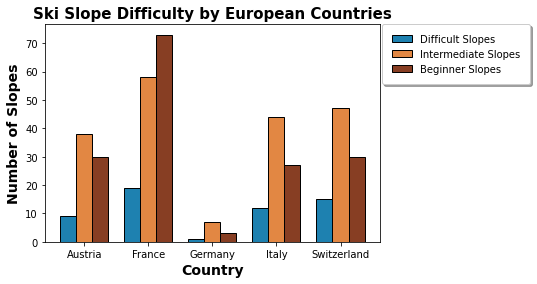

In [177]:
# Bar width
barWidth = 0.25

# Define Bar Height
d_slope = list(ski_df['DifficultSlope'])
i_slope = list(ski_df['IntermediateSlope'])
b_slope = list(ski_df['BeginnerSlope'])
names = list(ski_df['Country'])

# Define Bar Width
r1 = np.arange(len(d_slope))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Create the plot
plt.bar(r1, d_slope, color='#1e81b0', width=barWidth, edgecolor='black', label='Difficult Slopes')
plt.bar(r2, i_slope, color='#e28743', width=barWidth, edgecolor='black', label='Intermediate Slopes')
plt.bar(r3, b_slope, color='#873e23', width=barWidth, edgecolor='black', label='Beginner Slopes')

# Add xticks in the middle of the group bars
plt.xlabel('Country', fontweight='bold', fontsize = 14)
plt.ylabel('Number of Slopes', fontweight='bold', fontsize = 14)
plt.xticks([r + barWidth for r in range(len(d_slope))], names)
plt.legend(bbox_to_anchor=(1.45, 1), borderaxespad=0, fontsize=10, shadow=True, borderpad=1)
plt.title("Ski Slope Difficulty by European Countries", fontsize = 15, fontweight='bold')

# Save figure
plt.savefig("Europe_Slopes", dpi=1200, bbox_inches = 'tight')

plt.show()